# Quantum Search via Quantum Singular Value Transformation

Here, we present a Quantum Singular Value Transformation (QSVT) algorithm, which makes use of Block-encoding and Quantum Signal Processing (QSP) to perform search on unstructured data. Unlike Grover's Search, this algorithm does not require a different choice of Oracle and Diffuser for different marked states and thus, scales trivially with the number of input qubits. It also utilizes the whole Bloch sphere instead of merely a 2D plane where the probability of overshooting increases with the system size.

We then implement the algorithm using Qiskit and compare the algorithm with the Generic Grover's for 2 and 3 qubit cases.

This is the first instance of our continuing effort to make QSVT more accesible to a broader community.

## Contents

1. [Introduction](#introduction)
2. [Fixed-point Amplitude Amplification](#fpaa)
3. [Quantum Signal Processing](#qsp)
4. [Quantum Singular Value Transformation](#qsvt)
5. [Search with QSVT](#how)
6. [Building the Circuit](#build) <br>
     6.1 [2 qubit Example](#ex1) <br>
     6.2 [3 and 4 qubit Examples](#ex2) <br>
     6.3 [General Examples (6 and 9 qubits)](#ex3) <br>


## 1. Introduction <a id='introduction'></a>

One of the most well known quantum algorithms is Grover's search. In this algorithm, search on an unstructured data set is performed and a quadratic speed up is obtained thanks to quantum principles such as superposition.

Of course, the use of Grover's extends beyond merely searching for a marked element in an unordered list. The main idea behind the algorithm, Amplitude Amplification (AA) can be used as a subroutine for many other algorithms to obtain quadratic speed ups. Details of how AA serves as a basis for Grover's search is explained rather meticulously in the Qiskit textbook.

In simplest terms, AA in Grover's makes use of a so-called Oracle that flips the sign of the marked state and a Diffuser, which then reflects the states about the mean value. Applied in succession, this results in amplifying the the amplitude of the marked element while reducing the amplitudes of all the other non-marked elements.

Visually, this corresponds to a vector rotating back and forth in a 2D plane, starting from an initial point, trying to reach the top axis. 

There are two obvious problems with Grover's that are limiting its usefulness:
1. For every element in the list, there exists a distinct matrix corresponding to its Oracle, therefore circuit representations of each Oracle is different (and rather non-trivial to implement as the number of input qubits increases).

2. The search, if not started from a specific initial point, is at the risk of overshooting and having to run over and over again, missing the target state. This is the problem of overcooking and undercooking, namely, the Soufflee problem.

There has been many attempts to improve on the original Grover's since then, however, a work published on 2014 by Yoder, Low and Chuang particularly stands out, called [Fixed-point Amplitude Amplification](https://arxiv.org/abs/1409.3305).

## 2. Fixed-point Amplitude Amplification <a id='fpaa'></a>

The results of Yoder, Low and Chuang suggests that an optimal search using a different type of Oracle can be done, which **instead of flipping the sign of the marked state, flips an ancilla qubit from $|0\rangle$ to $|1\rangle$**. This approach depends on a key idea called **qubitization**.

The problem of finding a marked element in an unordered list is in general a $2^n$ dimensional problem, where $n$ is the number of input qubits. For example, performing search on 3 qubits corresponds to looking at a list of $2^n = 8$ basis states formed by the 3 qubits.

However, the problem of searching for an element has a unique property we can exploit. Namely, there is a hidden qubit in the problem. Notice that one can write the initial state as a linear combination of just 2 states, the marked state $|t\rangle$ (which we will call the 'target') and the combination of all the non-marked states $|t_{\bot}\rangle$ (this state is effectively perpendicular to the target state). In light of this discussion the initial state $|s\rangle$ can be written as:

$|s\rangle = \cos(\frac{\phi}{2}) |t\rangle + \sin(\frac{\phi}{2}) |t_{\bot}\rangle$

With this, we've reduced the $2^n$ dimensional problem into a single-qubit problem where $|t\rangle$ behaves as $|0\rangle$ and $|t_{\bot}\rangle$ behaves as $|1\rangle$ in this reduced space. We have thus, qubitized the problem!

While this procedure is rather obvious in Quantum Search, there are many non-trivial qubitization routines one can employ in order to solve hard problems. We suggest checking this (link of original QSVT paper here) for further examples.

## 3. Quantum Signal Processing <a id='qsp'></a>

Meanwhile, seemingly irrelevant to Search, another important problem in quantum information was addressed by again Yoder, Low and Chuang. That is, how to create arbitrary functions from quantum circuits. The result from their [work](https://arxiv.org/abs/1603.03996) in 2016 has put forward that successive applications of rotation gates that use different rotation axes in the x-y plane, but the same rotation angle can be used to represent polynomial functions of the form $P(\cos\theta)$. This form in the most general case corresponds to a Chebyshev polynomial.

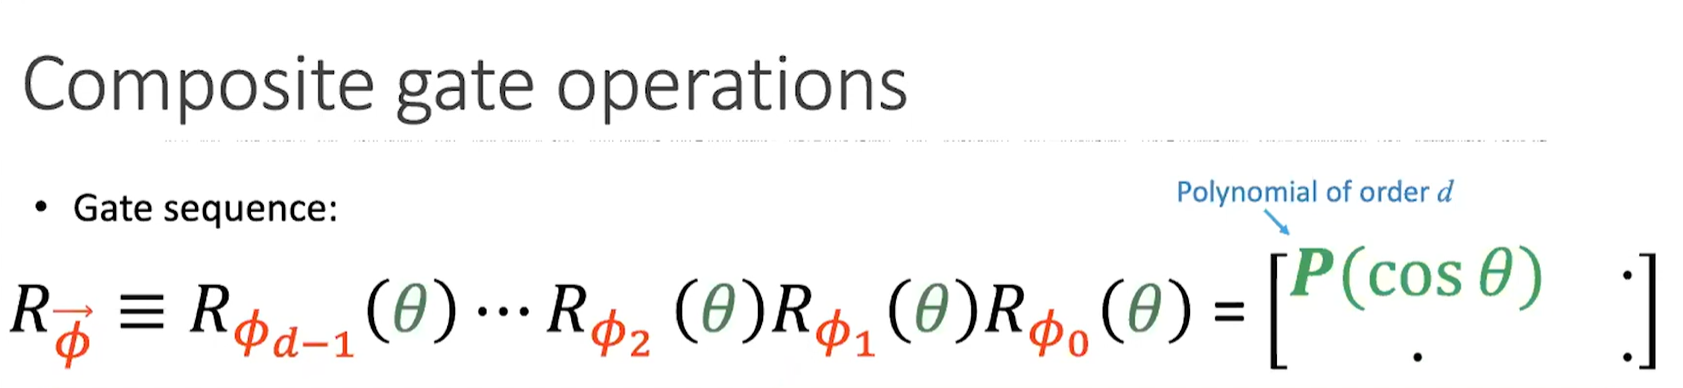
Credit: [Isaac Chuang - Grand Unification of Quantum Algorithms](https://www.youtube.com/watch?v=GFRojXdrVXI&t=2083s)

Here, the $\phi_i$ define the axes of rotation in the x-y plane, measured from the positive x-axis, and the $\theta$ defines the angle of rotation around that axis. And $d$ is the highest degree of the represented polynomial $P$.

In particular, Quantum Signal Processing Theorem states that if $P(\theta)$ that satisfies some constraints, there exists $\phi_i$ such that the above equation holds.

It turns out that Search can actually be thought of as an instance of this QSP routine! This idea of algorithms being instances of some more fundamental scheme is the main motive behind what follows, the Quantum Singular Value Transformation.

## 4. Quantum Singular Value Transformation <a id='qsvt'></a>

Following the formulation of qubitization and QSP, a general theory called [Quantum Singular Value Transformation](https://dl.acm.org/doi/pdf/10.1145/3313276.3316366) (QSVT) have been formed by Gilyen, Low, Su and Wiebe in 2019, which states that in any problem that can be qubitized, there exists a so-called Quantum Singular Value Transformation where an arbitrary polynomial transformation of the singular values of a matrix can be achieved in a quantum circuit effectively!

That is a mouthful. So to put it in simpler terms, QSVT allows for quantum circuit representations of smooth functions $f(x)$ that satisfy some constraints. It turns out a vast class of smooth functions can be implemented. Note that the functions $f(x)$ are arbitrary, meaning they don't have to correspond to unitary operations! This is HUGE, as it expands the possible use-cases of Quantum Computers and especially NISQ-era algorithms greatly!

QSVT also shows that many existing Quantum algorithms are essentially singular value transforms with different singular vectors and singular values. This serves as a Unification scheme for Quantum algorithms, allowing us to use the same universal circuit structure for many algorithms. 

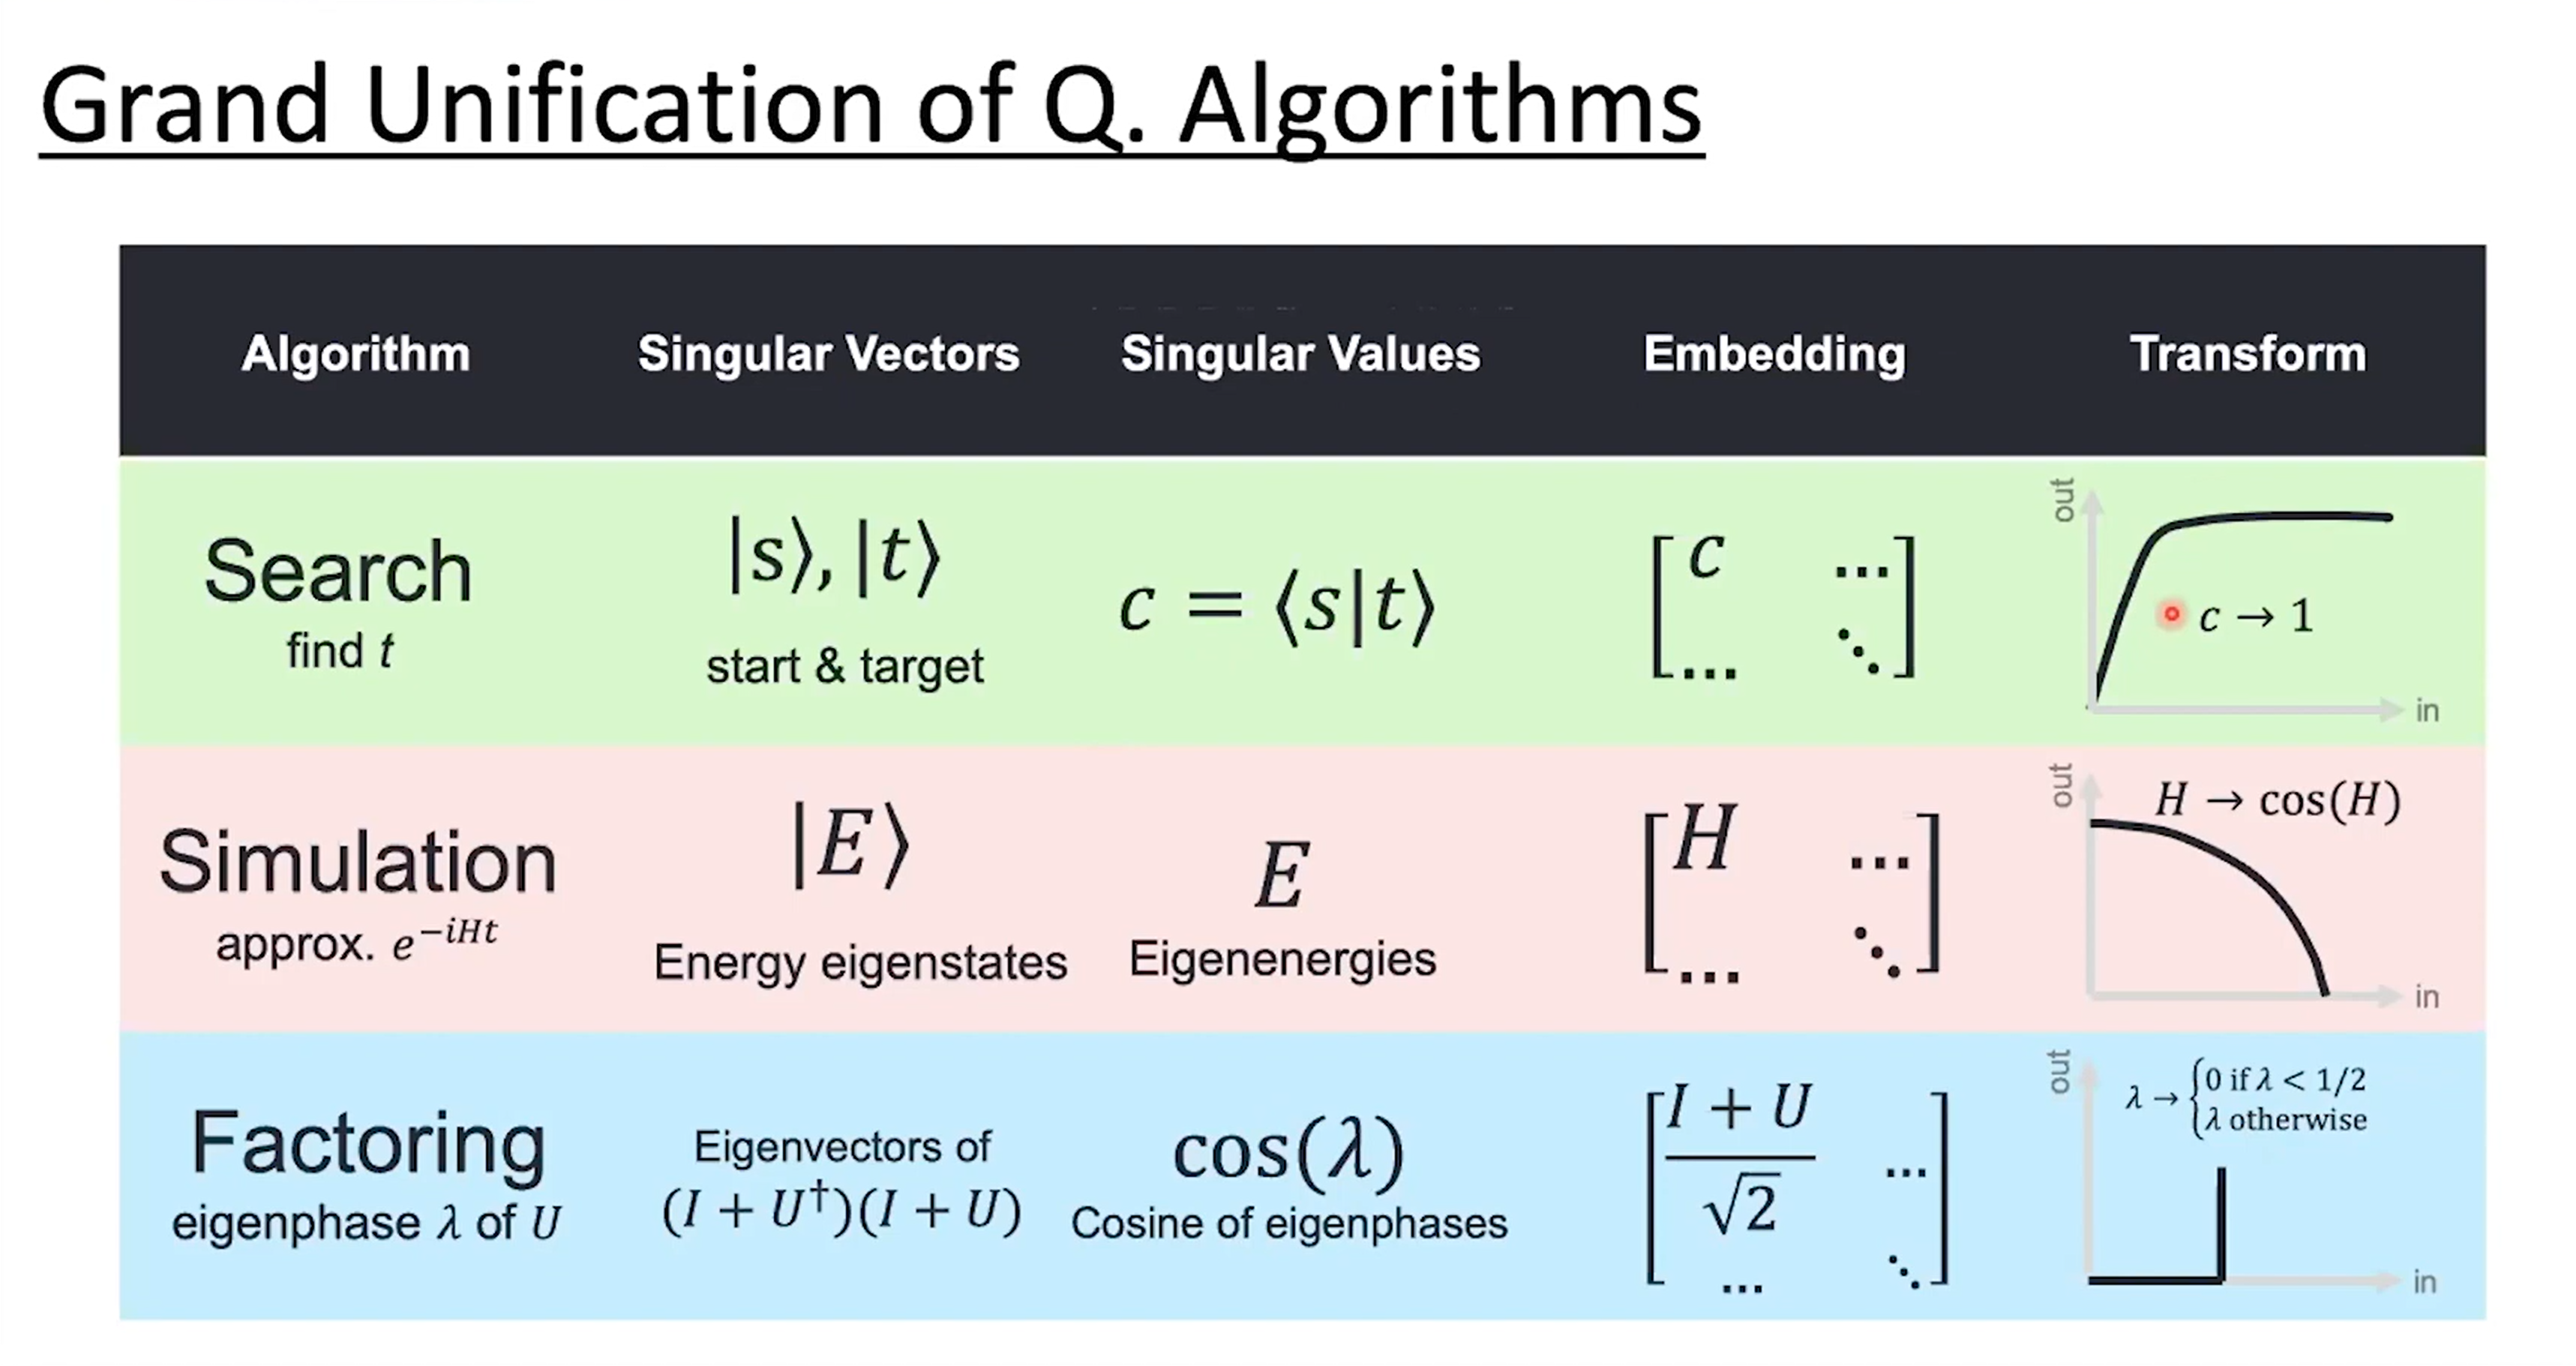
Credit: [Isaac Chuang - Grand Unification of Quantum Algorithms](https://www.youtube.com/watch?v=GFRojXdrVXI&t=2083s)

The goal of QSVT is to encode a (not necessarily unitary) scalar/matrix of interest $A$ into the upper-left block of a Unitary matrix $U_A$. Hence, it is called a **block-encoding of $A$ into $U_A$**. This is illustrated below:

$U_A = 
\begin{bmatrix}
A & . & .  \\
. & . & .  \\
. & . & .  \\
\end{bmatrix}
=
\Pi_l A \Pi_r$

The $\cdot$ in the matrix means they are arbitrary elements chosen such that the total matrix $U_A$ is a unitary even if $A$ is not. 

After encoding this object of interest $A$, $d$ successive applications of a circuit containing $U_A$ and some corresponding left and right Projectors $\Pi_l$ and $\Pi_r$ interleaved with $R_Z(\phi_i)$ rotations on an ancillary qubit will result in the polynomial transformation of $A$. $\phi_i$ here are the Quantum Signal Processing phases corresponding to the polynomial approximation $P(x = \cos\theta)$ of the desired smooth function $f(x)$ which satisfies the QSP constraints, and $d$ is the degree of the polynomial (ie. the highest degree).

Putting the whole circuit in a black-box and calling it $U_A'$ we get:

$U_A' =
\begin{bmatrix}
P(A) & . & .  \\
. & . & .  \\
. & . & .  \\
\end{bmatrix}$

"Where is the **Singular Value Transform** in this picture?" one might ask. Briefly, what is actually going on is that, $A$, as every matrix, has a singular-value decomposition (SVD) such that;

$A = W\Sigma V^\dagger$

where $\Sigma$ is a diagonal matrix with singular values as elements. More formally, the above transformation can be also expressed as:

$U_A' =
\begin{bmatrix}
W P(\Sigma) V^\dagger & . & .  \\
. & . & .  \\
. & . & .  \\
\end{bmatrix}$

But these expressions are equivalent, and it is much more intuitive and easy to talk about the polynomial transformation of $A$ directly, than to talk about the polynomial transformation of the singular values of $A$.

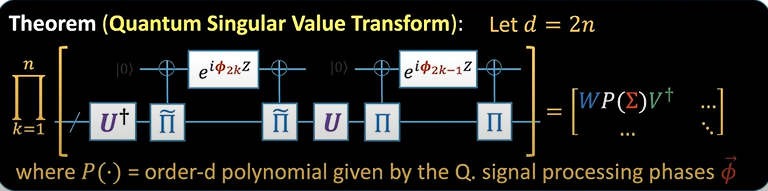
Credit: [Isaac Chuang - Grand Unification of Quantum Algorithms](https://www.youtube.com/watch?v=GFRojXdrVXI&t=2083s)

## 5. Search with QSVT <a id='how'></a>

The goal here in QSVT-Search is to encode the inner product $ A = \langle s|t\rangle$ and apply a polynomial transformation that takes the value of $A$ from whatever it is, to the value of 1:

$f(A) \approx P(A) \rightarrow 1$

Notice that $A$ in our case is merely a scalar ($1x1$ matrix).

This higher-level task can be divided into smaller tasks:
1. Choose a smooth function $f(x)$ that satisfies the QSP conditions which maps inputs to the value of 1.
2. Approximate the function in terms of Chebyshev polynomials (A Fourier-Chebyshev expansion) and obtain the coefficients of expansion.
3. Generate the Quantum Signal Processing phases from these coefficients
4. Find the block-encoded unitary $U_A$ with $A = c$ in our case, and find the corresponding projectors $\Pi_l$ and $\Pi_r$
5. Build the circuit which flips the signal qubit from $|0\rangle$ to $|1\rangle$ when it finds the marked element.

Let's show by example!

**Note:** We are yet to correctly implement arbitrary QSP phase factors into the Qiskit circuit. Right now, we've got it to work only with phases for pure Chebyshev polynomials, which results in deep circuits after 9 qubits. When this problem is solved, the depth of the circuit should also remain constant for any number of input qubits. This is work in progress!

## 6. Building the circuit <a id='build'></a>

So first we need to assess the correct circuit elements and than come up with a script that combines them together given input.

In [3]:
import warnings; warnings.simplefilter('ignore')

In [4]:
# Importing the necessary libraries
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.tools.jupyter import *
from qiskit.visualization import *

Let's say we want to simply create a circuit for 2 qubits, we will need 1 qubit for doing the block-encoding and 1 additional ancillary qubit for rotations. Thus, we need a total of 2 ancillary qubits.

However, because our block-encoding is of a trivial scalar, namely the inner product, we can get away with **always** using just 2 additional qubits (1 for block-encoding called 'signal' qubit, and 1 for rotations called 'ancilla'). Thus no matter how many **system qubits** we have (number of qubits which we are actually trying to solve the search problem for) we always just need 2 additional qubits, nothing more!

So for 2 system qubits we need a total of 4 qubits, for 3 system qubits we need a total of 5 qubits, for 1198 qubits we need 1200 qubits. The advantage of this becomes apparent when the number of system qubits becomes very large.

Let's build the circuit elements and then use it for a 2 qubit search!

In [10]:
#we have 2 system qubits
system_qubits = 2 
#following the argument above we need 2 additional qubits
nqubits = system_qubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)  

With 2 system qubits, a uniform superposition state $|s\rangle = \frac{1}{\sqrt{2^2}}(|00\rangle + |01\rangle+ |10\rangle + |11\rangle)$. Notice that for a single marked element, whatever that element may be, the inner product is $c = \langle s|t\rangle = \frac{1}{2}$. This is in general true for n qubits, such that for an $2^n$ dimensional problem we have $c = \langle s|t\rangle = \frac{1}{\sqrt{2^n}}$.

In the case of 2 qubits, we want a mapping $f(c) = f(\frac{1}{2}) \rightarrow 1$. A good candidate that satisfies the conditions of QSP is $f(x) = tanh(x)$. It could be made very steep whilst still satisfying the QSP constraints, becoming something close to a step function via a transformation $x \rightarrow x'=100x$. We would expand this function in terms of Chebyshev polynomials and obtain QSP phases and use them in the circuit. This would be ideal.

However, as stated above, as of now, even though we can correctly generate the phases for arbitrary functions we can only implement pure Chebyshev polynomials as a proof of concept in a Qiskit circuit and not their linear combinations which would correspond to a proper expansion.

Thus, we need to find a pure Chebyshev polynomial that maps to $f(x) = \pm1$. This is because $f(x)$ gives the probability amplitude and we are actually interested in $|f(x)|^2$ which would give us the probability. It so happens that for $x = \frac{1}{2}$, the 3rd Chebyshev polynomial does exactly this! In other words $T_3(\frac{1}{2})=-1$, where $T_n(x)$ is the nth Chebyshev polynomial. We can see this visually below:

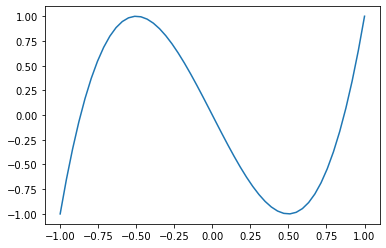

In [11]:
x = np.linspace(-1, 1)
test = np.polynomial.Chebyshev((0, 0, 0, 1)) # The 3rd Chebyshev polynomial!
y = test(x)
plt.plot(x, y)

Now all that is left for us to do is to build the circuit that would apply the $T_3$ transformation on our inner product! For this we need our Oracle, our projectors, and our phases for rotation.

For pure Chebyshev polynomials, these phases are trivial and has an analytic form: (more general, arbitrary functions requires the use of QSP_solver module in the repository which we have translated into Python from Matlab from the [work](https://arxiv.org/abs/2002.11649) of Dong et al. 2020 - https://github.com/qsppack/QSPPACK)

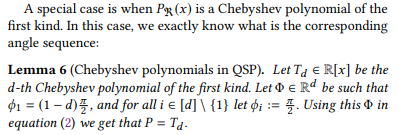
 Credit: [Gilyen et al. 2019](https://dl.acm.org/doi/pdf/10.1145/3313276.3316366)

The lemma states that given $T_d$, the first phase is $(1-d)\frac{\pi}{2}$ and the rest of the phases are simply $\frac{\pi}{2}$. **It is important to note that**, due to Qiskit's definition of $R_Z(\theta) = f(\frac {\theta}{2})$ all of our phases must be scaled by a factor of 2 before we put them into the circuit!

So then, we are ready to build the circuit!

In [5]:
# Define projectors.
# Note that p_left is actually p_right from above because the order
# of operations are reversed when equations are turned into circuits
# due to how time-flow is defined in circuit structures

# In the Qiskit implementation qubit indexes start from 0
# and the most significant qubit is the highest index
# keeping this in mind e.g for 4 nqubits = {q0,q1,q2,q3}
# q0 and q1 are the system qubits
# q2 is the signal qubit
# q3 is the ancillary rotation qubit
# nqubits-1 = 4-1 = 3 below, then corresponds to q3

def p_left(q, phi): #right projector
    qc = QuantumCircuit(q)
    n = q
    ctrl_range = list(range(0,n-1))
    
    for qubit in range(n-1): # Implement a simple multi 0-controlled
        qc.x(qubit)
    qc.mcx(ctrl_range , n-1) # 0-Controlled on all but the last qubits, acts on the last qubit
    for qubit in range(n-1):
        qc.x(qubit)
        
    #qc.barrier(0, 1, 2, 3)
    qc.rz(phi, n-1) # RZ(phi) on the last qubit
    #qc.barrier(0, 1, 2, 3)
    
    for qubit in range(n-1): # Reverse the effect of the first multi-control
        qc.x(qubit)
    qc.mcx(ctrl_range ,n-1) 
    for qubit in range(n-1):
        qc.x(qubit)
    
    p_left_gate = qc.to_gate() # Compiles all this into a gate
    p_left_gate.name = "P$_l$(Φ)"
    return p_left_gate

def p_right(phi): # Left projector acts just on the signal and the ancillary qubit
    qc = QuantumCircuit(2)
    
    qc.cx(0, 1)
    qc.rz(phi, 1)
    qc.cx(0 ,1)
    
    p_right_gate = qc.to_gate()
    p_right_gate.name = "P$_r$(Φ)"
    return p_right_gate

In [1]:
#Define Oracle and the reverse-gate for 
#constructing the dagger later

def U(q): 
    qc = QuantumCircuit(q)
    n = q + 1
    
    for qubit in range(n-2):
        qc.h(qubit)
    
    qc.mcx(list(range(0,n-2)), n-2)
    
    U_gate = qc.to_gate()
    U_gate.name = "U"
    return U_gate

def reverse_gate(gate):
    gate_rev = gate.reverse_ops()
    gate_rev.name = gate.name + "$^†$"
    return gate_rev

## 6.1 - 2 Qubit Example <a id='ex1'></a>

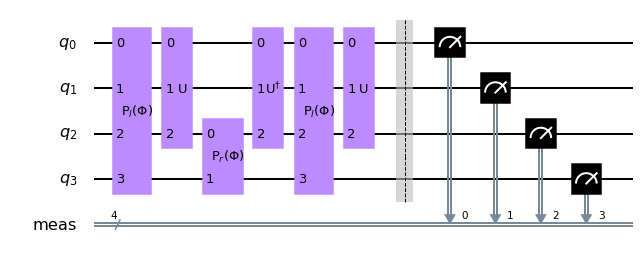

In [14]:
#we have 2 system qubits
system_qubits = 2 
#following the argument above we need 2 additional qubits
nqubits = system_qubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)

d = 3

u = U(nqubits-1)
u_dag = reverse_gate(u) #construct U_dagger

p_right_range = [nqubits-2, nqubits-1] # build the ranges of qubits for gates to act upon
u_range = list(range(0, nqubits-1))
p_left_range = list(range(0, nqubits))

circuit.append(p_left(nqubits, (1-d)*pi), p_left_range) # in general, starting from this line, 
circuit.append(u, u_range)                              # the circuit would iterate over the phases,
                                                        # but the phases for pure Cheby are just trivial pi/2
                                                        # so we chose to directly putting pi's in here for simplification
for i in range((d-1)//2):                               # we put pi instead of pi/2 because of how RZ is defined in Qiskit
    circuit.append(p_right(pi), p_right_range) 
    circuit.append(u_dag, u_range)
    circuit.append(p_left(nqubits, pi), p_left_range)
    circuit.append(u, u_range)

circuit.measure_all()
circuit.draw('mpl')

Notice that, for $T_3$, we have $3=d$ iterations of our Unitaries ($U$, $U^\dagger$, $U$) as suggested above.

The elements of the circuit are designed so that in this form the marked element is $|11\rangle$ and the input is **always** mapped to this state. We can see this by running the circuit in the qasm_simulator below:

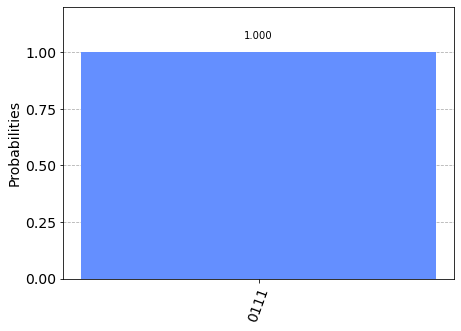

In [15]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

The above result shows that our initial input of $|q_3 = 0, q_2 = 0, q_1 = 0, q_0 = 0\rangle$ has been mapped onto $|0111\rangle$ meaning that the system qubits $q_0$ and $q_1$ have been correctly mapped onto the $|11\rangle$ state and the signal qubit $q_2$ has been also flipped to $|1\rangle$ as a result of finding the marked element! $q3$ remains in $|0\rangle$ as it is just used for rotations as an ancillary.

Generalizing the search with a function such as a steep $tanh(.)$ would be very straight-forward, however as we are limited with Chebyshev polynomials, we had to come up with a way of finding Chebysyev polynomials of the form $T_d(x=\frac {1}{\sqrt(2^n)}) \approx 1$ (we will see later that it is actually the **squares** of Chebyshev polynomials we care about for probabilities).

In the 2 qubit case, $n=2$ resulted in $d=3$. So this hints at a relation such as $d=2n-1$, and indeed this is approximately true for up to $n=6$, after which we've discovered there are additional terms in the sum. This is in general not an easy task, and it is not useful after some point due to $d$ getting very large, resulting in very deep circuits. However, the pure Chebyshev polynomial construction serves as a proof of principle for implementation in Qiskit!

In reality, once the challenge of implementing arbitrary functions is solved, because $d$ will no longer be a function of $n$, the depth of the circuit will be constant for however many qubits!

In light of the above discussion we can add a new line of code for defining $d$ in terms of $n$:

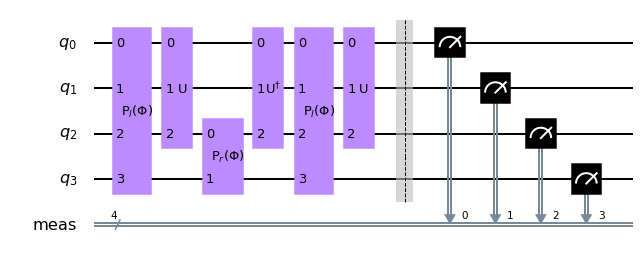

In [16]:
# We have 2 system qubits
system_qubits = 2 
# Following the argument above we need 2 additional qubits
nqubits = system_qubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)
############################## d in terms of n!
d = (2*system_qubits) - 1

if system_qubits > 6 and system_qubits < 10:
    for i in range(1, system_qubits - 6 + 1):
        d += 2 * i
###############################

u = U(nqubits-1)
u_dag = reverse_gate(u)

p_right_range = [nqubits-2, nqubits-1]
u_range = list(range(0, nqubits-1))
p_left_range = list(range(0, nqubits))

circuit.append(p_left(nqubits, (1-d)*pi), p_left_range)
circuit.append(U(nqubits-1), u_range)

for i in range((d-1)//2):
    circuit.append(p_right(pi), p_right_range) #debug this, doesnt work just as a 2 qubit gate
    circuit.append(u_dag, u_range)
    circuit.append(p_left(nqubits,pi), p_left_range)
    circuit.append(u, u_range)

circuit.measure_all()
circuit.draw('mpl')

Because we have constructed our Oracles in such a way that the input is mapped onto the $|1\rangle^{\otimes n}$ state for $n$ system qubits, without loss of generality, we can find any element we are searching for by putting conditional $NOT$ gates at the end of the circuit. Ideally, this too can be incorporated into the Oracles themselves, which is work in progress!

**Very Important Note:** It is very important to notice the fundamental difference between how the original Grover's oracles and the QSVT oracles operate! In the original Grover's, the Oracles are matrices that **flip the sign of the marked element**. In order to do this, it requires a priori knowledge about where this element is in the first place (and there is a subtle nuance to this where it actually does not require this knowledge but check for each possible marked element, either way you need to pre-determine the Oracles). This is very counter-intuitive as it is in the first place a search for the place of this marked element itself!

On the other hand, the QSVT oracle operates as a transformation of the inner product and upon mapping it to 1, it flips the signal qubit. This fundamental difference is what makes QSVT Search much more scalable than the original Grover's.

After 3 qubits, the circuit implementation of sign flipping oracles for each element gets increasingly complex, and there is no guideline for the broader community to follow on implementing Grover's for more than 4 qubits. Whereas, for the QSVT oracle, nothing changes! To illustrate this, let's wrap our QSVT circuit in a function and look at the 3 and 4 qubit cases of QSVT Search. And also, let's add search for arbitrary outcomes not just $|1\rangle^{\otimes n}$.

## 6.2 - 3 and 4 Qubit examples <a id='ex2'></a>

Wrapping QSVT search in a function that takes the target state as the argument in a bit string:

In [30]:
def qsvt_search(target): # target = marked element, is a bit-string!
    
    systemqubits = len(target)
    nqubits = systemqubits + 2
    q = QuantumRegister(nqubits, 'q')
    circuit = QuantumCircuit(q)  

    d = (2*systemqubits) - 1

    if systemqubits > 6 and systemqubits < 10:
        for i in range(1, systemqubits - 6 + 1):
            d += 2 * i
    
    u = U(nqubits-1)
    u_dag = reverse_gate(u)
    
    p_right_range = [nqubits-2, nqubits-1]
    u_range = list(range(0, nqubits-1))
    p_left_range = list(range(0, nqubits))

    circuit.append(p_left(nqubits,(1-d)*pi), p_left_range)
    circuit.append(U(nqubits-1), u_range)

    for i in range((d-1)//2):
        circuit.append(p_right(pi), p_right_range) #debug this, doesnt work just as a 2 qubit gate
        circuit.append(u_dag, u_range)
        circuit.append(p_left(nqubits,pi), p_left_range)
        circuit.append(u, u_range)

    for i in range(len(target)): # The operation for acquiring arbitrary marked element
        bts = target [::-1]      # bitstring is reversed to be compatible with the reverse qubit order in Qiskit
        if bts[i] == '0':
            circuit.x(i)

    circuit.measure_all()
    return circuit

And running a 4-qubit test for the marked element 1101:

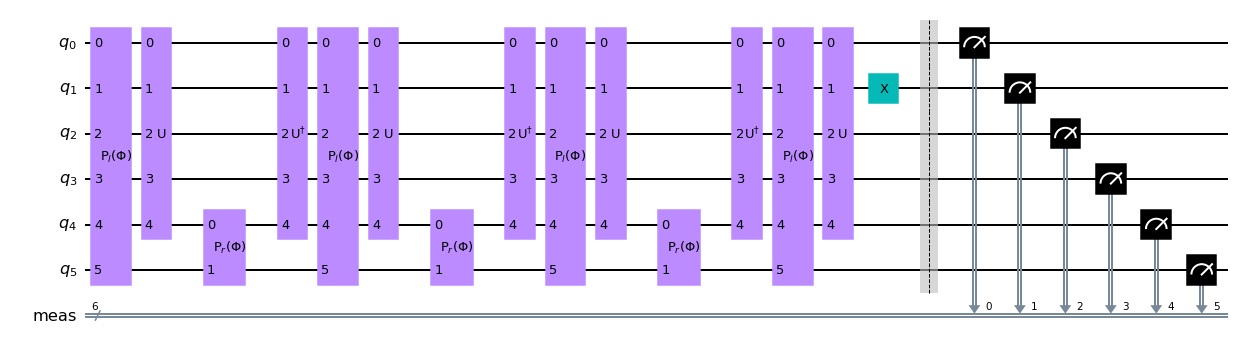

In [31]:
circuit_test = qsvt_search('1101')
circuit_test.draw('mpl')

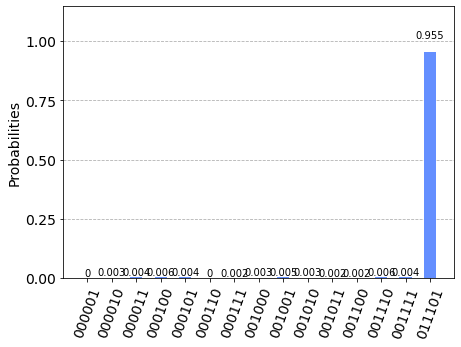

In [32]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit_test, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

Here also is a 3-qubit example:

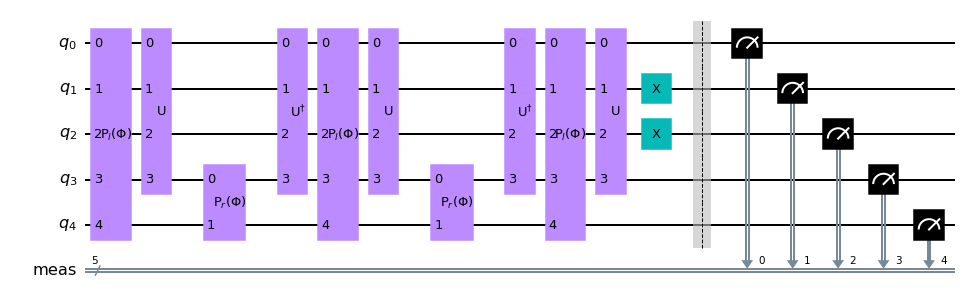

In [33]:
qc = qsvt_search('001')
qc.draw('mpl')

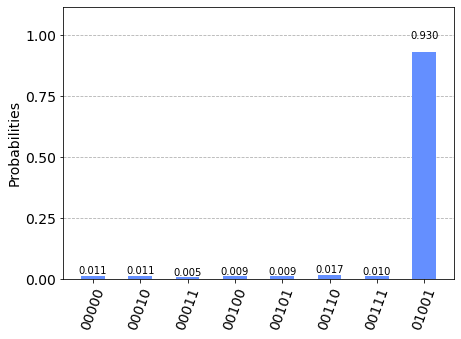

In [34]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(qc, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

The reason that the probabilities are not exactly 1 beyond the 2 qubit example is that, $T_d$ in general does not equal 1 at the given values, but is very close to it. This is how we chose it by construction! One thing we ommited up until this point also is that the probabilities are actually proportional to the $T_d^2$ and not merely $T_d$, even though $T_d \approx 1$ ensures the correctness of both.

Also, to illustrate that these are indeed transformations by pure Chebyshev polynomials, instead of using $d=2*systemqubits -1$ we can try for example $d=3$ for 4 qubits. In this case the denominator will be $\sqrt{2^4} = 4$.What we should obtain then the marked element with $P \approx |T_3(x=\frac{1}{4})|^2$. Evaluating this, we can see that:

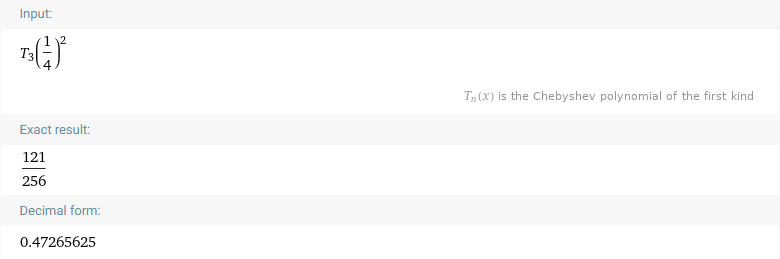

What we should see than is after many shots, the probability of measuring the marked element ('1111' in this case) should be roughly equal to this value!

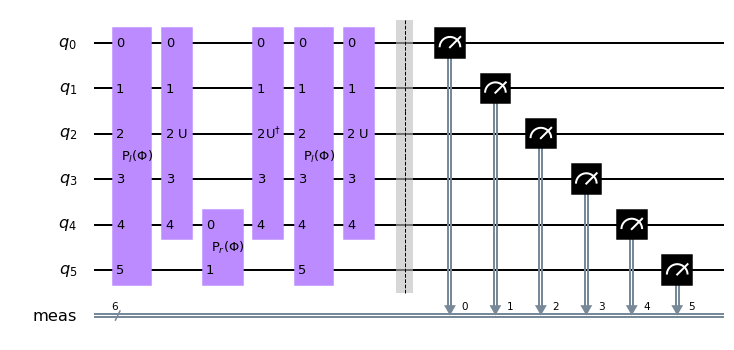

In [7]:
# We have 4 system qubits
system_qubits = 4 
nqubits = system_qubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)

d = 3 # set d = something you chose to test different values!

u = U(nqubits-1)
u_dag = reverse_gate(u)

p_right_range = [nqubits-2, nqubits-1]
u_range = list(range(0, nqubits-1))
p_left_range = list(range(0, nqubits))

circuit.append(p_left(nqubits,(1-d)*pi), p_left_range)
circuit.append(U(nqubits-1), u_range)

for i in range((d-1)//2):
    circuit.append(p_right(pi), p_right_range) #debug this, doesnt work just as a 2 qubit gate
    circuit.append(u_dag, u_range)
    circuit.append(p_left(nqubits,pi), p_left_range)
    circuit.append(u, u_range)

circuit.measure_all()
circuit.draw('mpl')

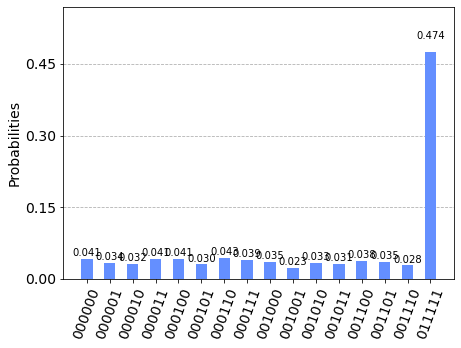

In [10]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

This is approximately the result we expected to obtain! Hence, this serves as a proof that $\langle s|1111\rangle$ has indeed been transformed by $T_3$!

## 6.3 - General Example (6 and 9 qubits) <a id='ex3'></a>

We can also demonstrate briefly that QSVT search works for beyond 4 qubits very easily, still finding the result!
Let's have a 6 qubit example, which would be very non-trivial for Grover version if we wanted to in general find any of the $2^6$ states. It is very easy to do with QSVT!

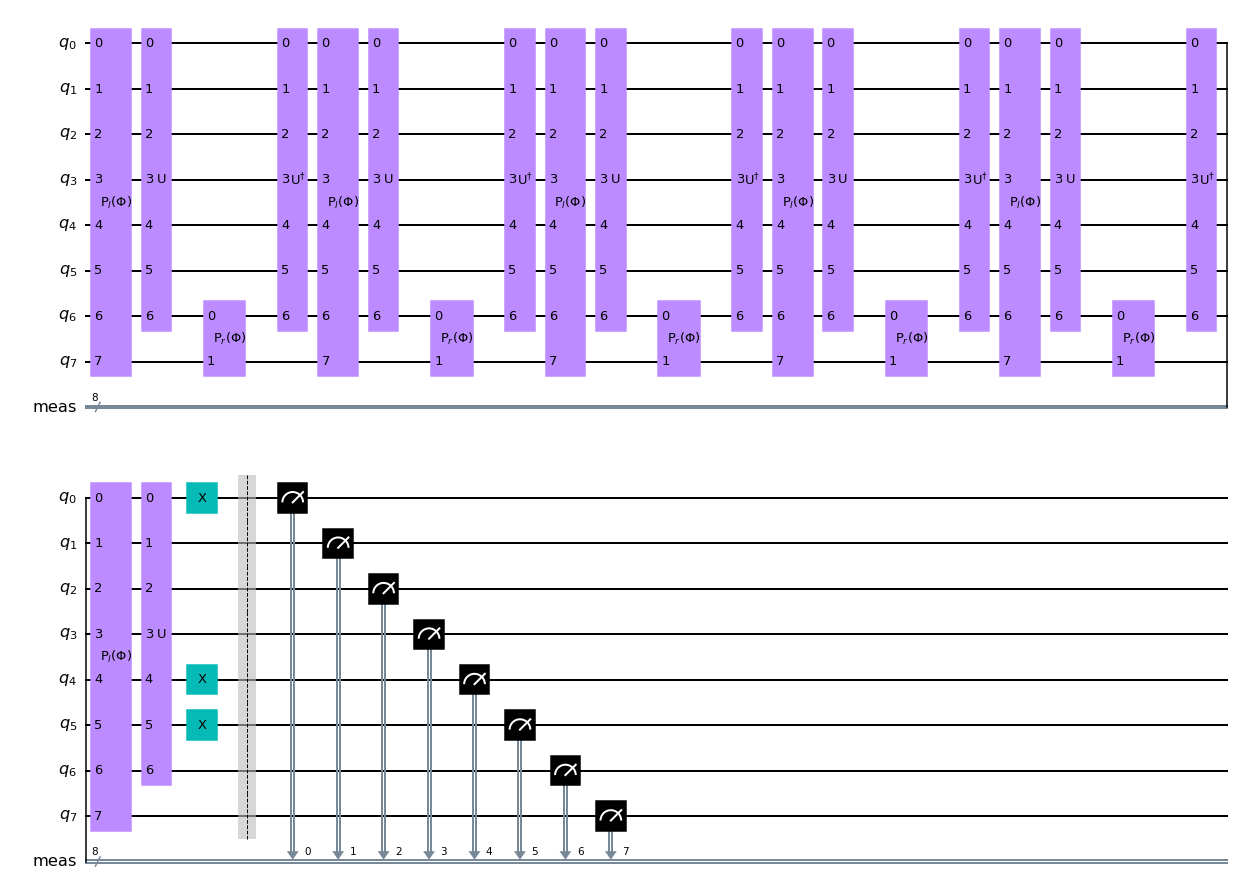

In [37]:
qc = qsvt_search('001110')
qc.draw('mpl')

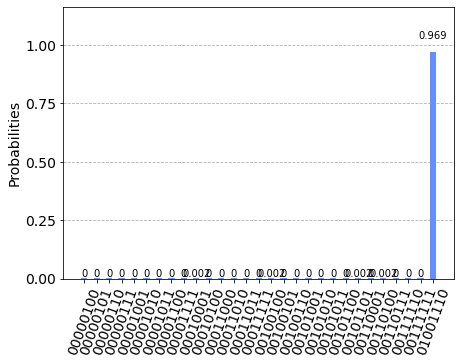

In [38]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(qc, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

We can even go on and do a 9 qubit example, but after this point, because we still can only do pure Chebyshev polynomials, the circuit becomes very deep, defeating its own purpose!

Further work will focus on fixing the discrepancy between our phases for general transformations and Qiskit implementation.

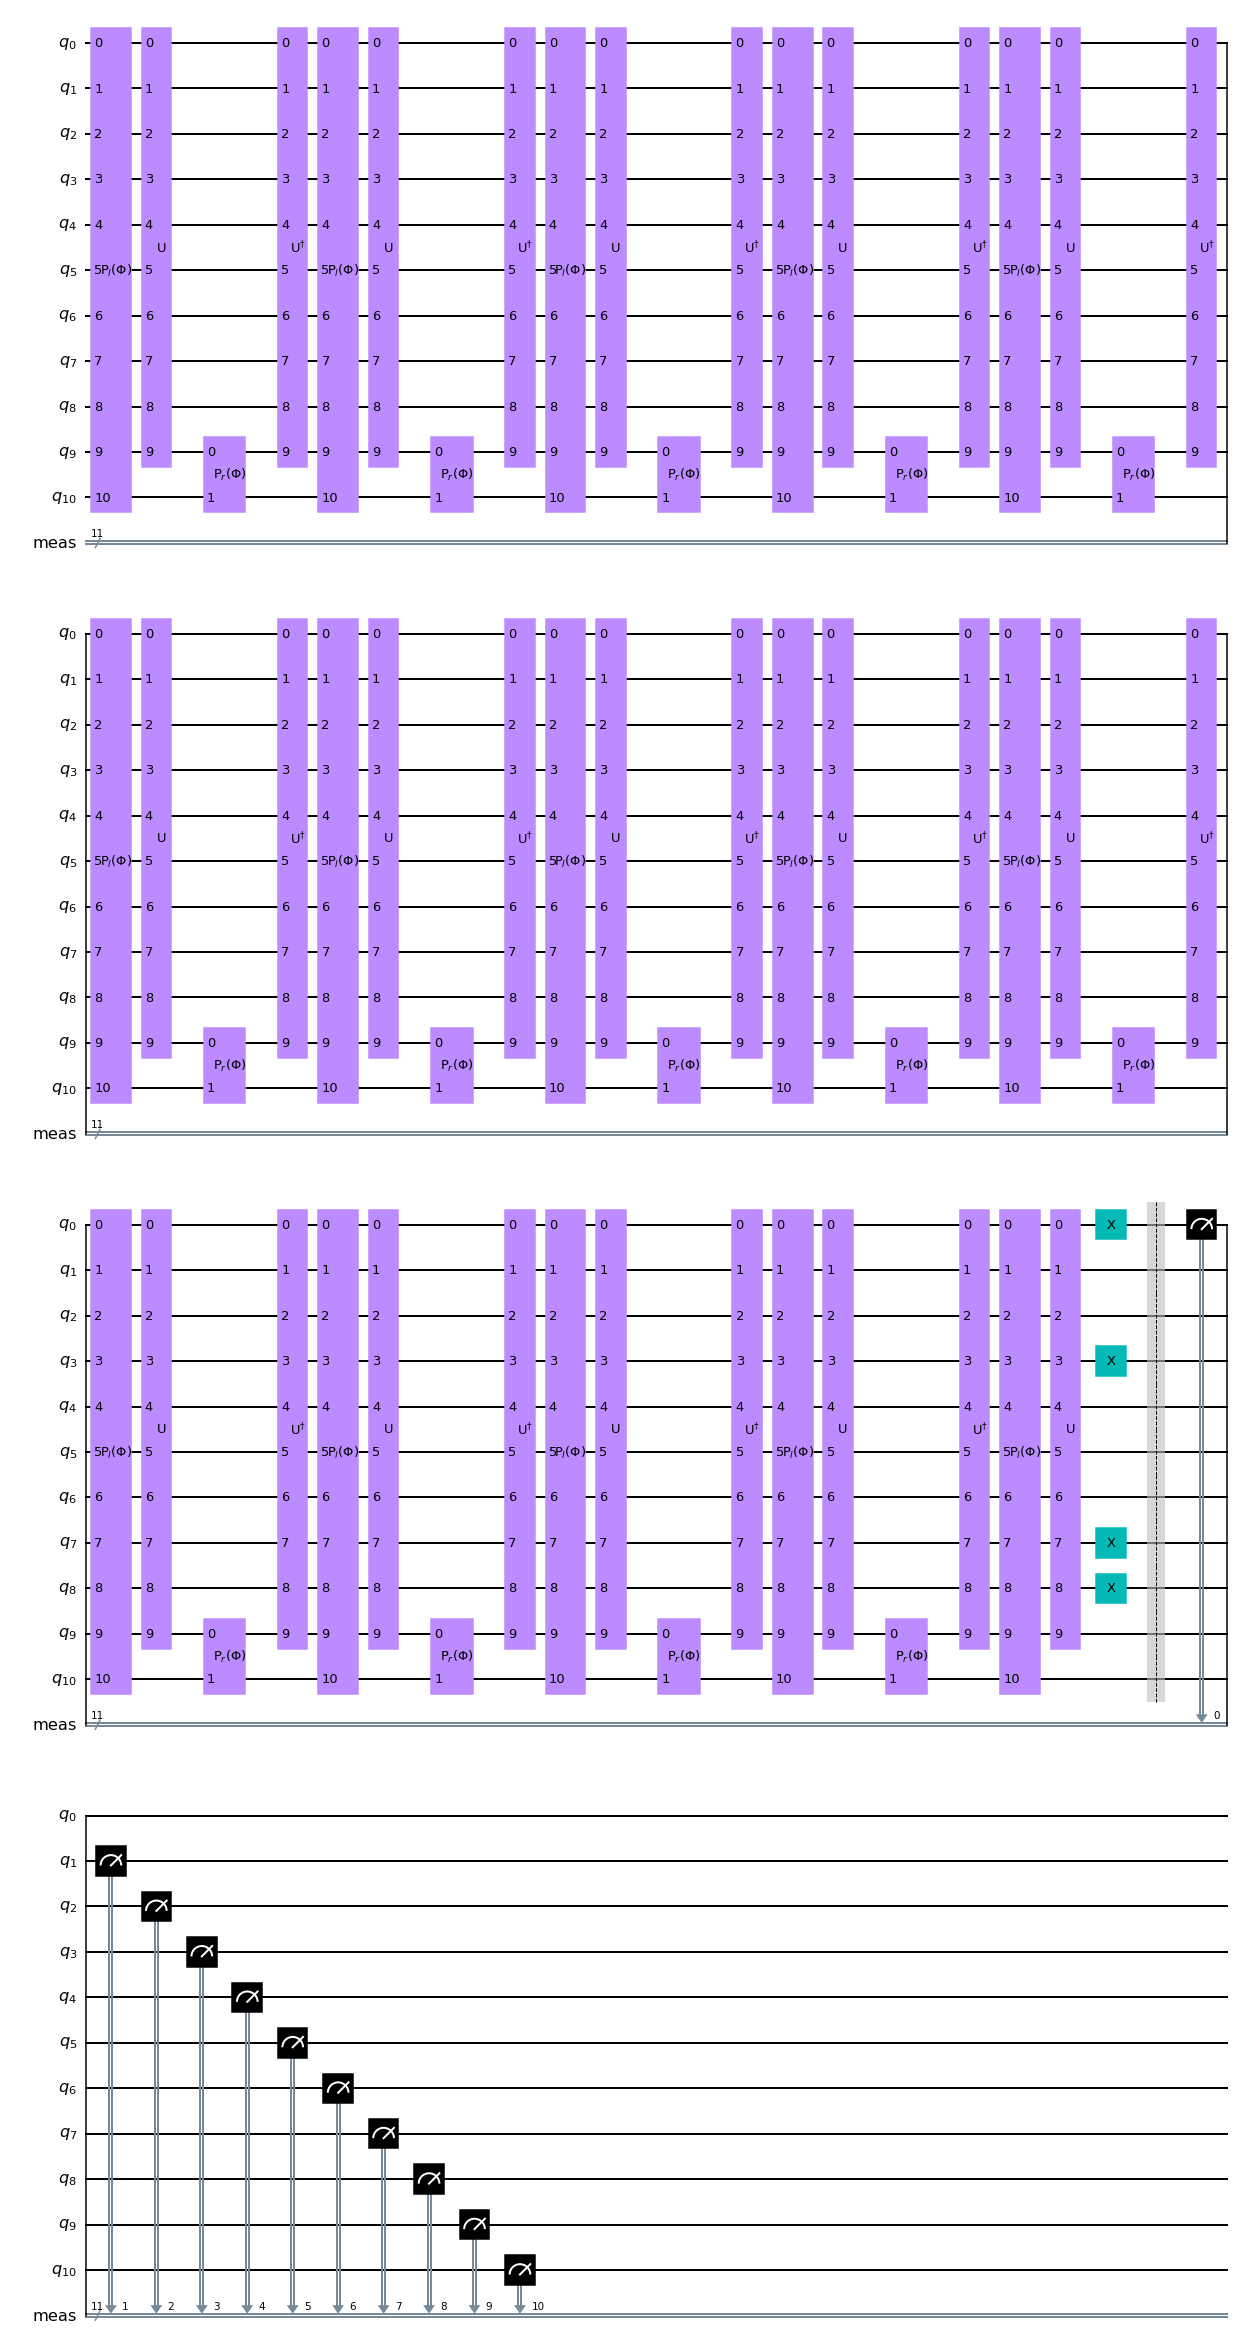

In [39]:
qc = qsvt_search('001110110')
qc.draw('mpl')

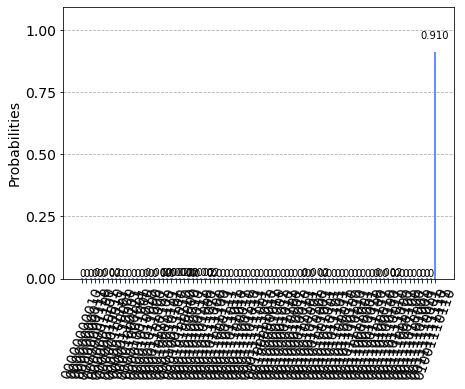

In [40]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(qc, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

Further work will be mainly concerned with finding how to correctly register the phases for arbitrary polynomials in Qiskit so that we can map any n-qubit state into its target while keeping the circuit depth constant!

Some details of our future roadmap can be found in the submitted Research paper.